<a href="https://colab.research.google.com/github/Shavedha/basic-nn-model/blob/main/Ex_1_DL_feb_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [ ]:
worksheet = gc.open('Dlexp1 ').sheet1


In [ ]:
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'INPUT':'float'})
dataset1 = dataset1.astype({'OUTPUT':'float'})
dataset1.head()

,INPUT,OUTPUT
0,1.0,11.0
1,2.0,16.0
2,3.0,21.0
3,4.0,26.0
4,5.0,31.0


In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [ ]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = scaler.transform(X_train)

In [ ]:
X_train1

array([[0.16666667],
       [1.        ],
       [0.        ],
       [0.72222222],
       [0.5       ],
       [0.61111111],
       [0.83333333],
       [0.66666667],
       [0.27777778],
       [0.11111111],
       [0.44444444],
       [0.05555556],
       [0.33333333]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(units=5,activation='relu',input_shape=[1]),
    Dense(units=3,activation='relu'),
    Dense(units=1)
])

In [ ]:
model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
model.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 3832.3440
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 3831.4651
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 3830.8083
Epoch 4/2000
1/1 [==============================] - 0s 13ms/step - loss: 3830.2488
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 3829.7439
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 3829.2751
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 3828.8318
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 3828.4065
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 3827.9951
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 3827.5942
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 3827.2017
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 3826.8154
Epoc

<Axes: >

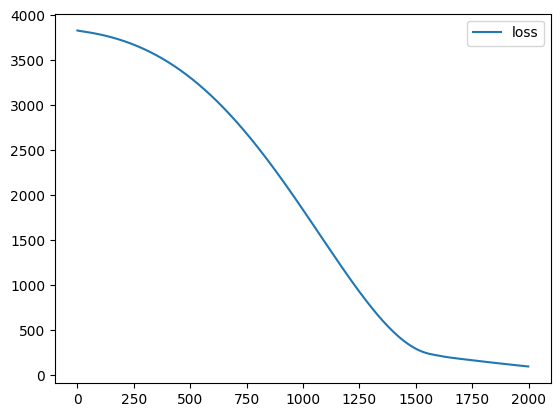

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
X_test1 = scaler.transform(X_test)

In [ ]:
model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 104ms/step - loss: 112.9701


112.9700698852539

In [ ]:
X_n1 = [[21]]
X_n1_1 = scaler.transform(X_n1)
model.predict(X_n1_1)

1/1 [==============================] - 0s 100ms/step


array([[94.81407]], dtype=float32)